<a href="https://colab.research.google.com/github/uddeshya-23/LogisticRegressionModel_Case_Study/blob/main/LeadScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WHY Logistic Regression for this Model ?


For Probability and prediction we use Logistic Regression . predicts between 0 to 1.

Logistic Regression

Log Odds

Probability

0 to 1

No highly intrepretible  if we fit y=10+5x1+2x2, we pass it in sigmoid function ( whose values oscillates between 0 to 1 ) p = 1 / (1 + e^-y)

In [1]:
print("Expected Result : \n 1. Build Logistic Regression Model \n 2. Conversion Predictions \n 3. Evaluation Metrics" )

Expected Result : 
 1. Build Logistic Regression Model 
 2. Conversion Predictions 
 3. Evaluation Metrics


### APPROACH

1. Import and Inspect DataSet

2. Data Preprations ( Encoding Categorical variables &, Handling of Null Values )

3. EDA ( Univariate Analysis , Outlier Detection , Checking Data Imbalance )

4. Dummy Variables Creation

5. Test-Train Split

6. Feature Scaling

7. Coorelations check

8. Model Building ( feature selection using (RFE, P-value), Improving model further according to value  adjusted r2, VIF )

9. Model Evaluation with different metrics Sensivity &, Specificity

In [2]:
#DATA VISUALIZATION

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#MODEL BUILDING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

##Model Evaluation

from sklearn import metrics
from sklearn.metrics import confusion_matrix , precision_score , precision_recall_curve



Load DATA SET

In [3]:
lead_s=pd.read_csv('/content/drive/MyDrive/Upgrad Data/Leads.csv')

Analyse The DATA SET

In [4]:
lead_s.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
lead_s.shape

(9240, 37)

Check The Type of Columns , Missing Values

In [6]:
lead_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Things needs to be taken care of

1. Empty Data

2. Encoding Categorical variables

3. Convert the "Select" column which is in "Specialization" Column to NaN

4. Dropping columns where Null values are more than or, equal to 30 percent

## DATA PREPRATION

--> Converting "yes/no" to "1/0"

--> Converting Select to NaN

In [7]:
#Encoding with 0/1
column_with_yes_no=['Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

for feature in column_with_yes_no:
  lead_s[feature]=lead_s[feature].apply(lambda x : 1 if x=='Yes' else 0)

lead_s.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:

lead_s.select_dtypes(include='object').info()  ## categorical variables which are still not encoded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

## Converting Select to NaN

In [9]:
lead_s=lead_s.replace('Select', np.nan)

## For each categorical columns check for the number of vakues  present in dataset

for col in lead_s.iloc[:,1:].select_dtypes(include='object').columns:
  print(col)
  print("----------")
  print(lead_s[col].value_counts(normalize=True))
  print("==========================================")

Lead Origin
----------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Lead Source
----------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
Last Activity
----------
Email Opened                    0.376163
SMS Sent  

Missing Values Handling

In [10]:
##Column Wise Missing values

round((lead_s.isnull().sum() / lead_s.shape[0] * 100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
## Unnecessary Columns like 'Prospect ID', Tags & all the columns with missing value more than or equal to 30 percent

unnecesssary=['Prospect ID','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education','How did you hear about X Education','Lead Profile']

In [12]:
lead_s.drop(unnecesssary, axis=1, inplace=True)


In [13]:
lead_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   int64  
 4   Do Not Call                                    9240 non-null   int64  
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [14]:
lead_s.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,0,0,NaN,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,NaN,0,0,NaN,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [15]:
##Lead Quality Depends Upon user input, For "Not Sure" -- NaN can be shown

lead_s['Lead Quality']=lead_s['Lead Quality'].replace(np.nan, "Not Sure")

## CITY can be imputed as Mumbai Because value for Mumbai is 0.57 Maxm. so all the Nulls can be Updated to Mumbai

lead_s['City']=lead_s['City'].replace(np.nan, 'Mumbai')


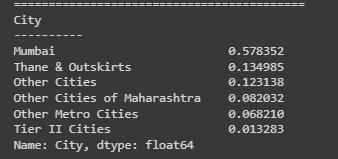

In [16]:
lead_s['Specialization']=lead_s['Specialization'].replace(np.nan, 'Other Specialization')

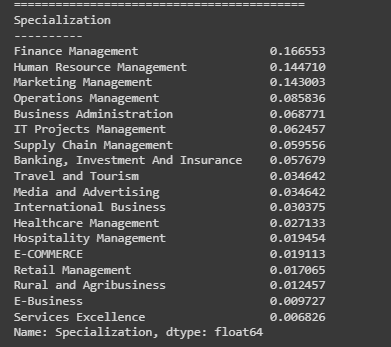

In [17]:
lead_s['Tags'].isnull().count()
lead_s['Tags']=lead_s['Tags'].replace(np.nan, 'Will revert after reading the email')

In [18]:
lead_s

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,...,0,0,Will revert after reading the email,High in Relevance,0,0,Mumbai,0,0,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,...,0,0,wrong number given,Might be,0,0,Mumbai,0,1,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,...,0,0,invalid number,Not Sure,0,0,Mumbai,0,1,SMS Sent
9238,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,...,0,0,Will revert after reading the email,Not Sure,0,0,Other Metro Cities,0,0,SMS Sent


In [19]:
## 99 percent data is of "Better career Prospects"
lead_s['What matters most to you in choosing a course']=lead_s['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

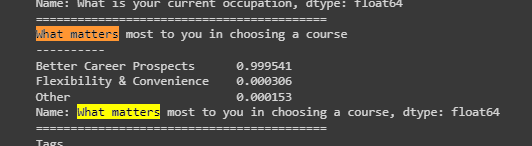

In [20]:
##more than 85 percent are unemplyed
lead_s['What is your current occupation']=lead_s['What is your current occupation'].replace(np.nan, 'Unemployed')

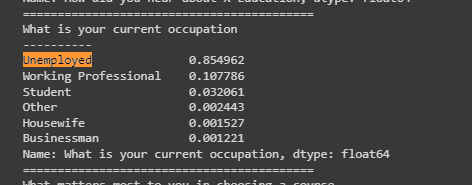

In [21]:
##More than 95% of them are from India
lead_s['Country']=lead_s['Country'].replace(np.nan, 'India')

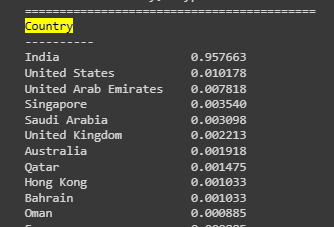

In [22]:
##Checking missing Data Percentage in the update "lead_s" dataset

round(100*(lead_s.isnull().sum()/len(lead_s.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [23]:
##Null values are now less than 2%, Rows can be dropped

lead_s.dropna(inplace=True)
lead_s.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [24]:
lead_s.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


Exploratory Data Analysis

In [25]:
## Check Data imbalance with Target Variable

lead_s["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [26]:
lead_s["Lead Source"].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

Unique values in 'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Unique values in 'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']


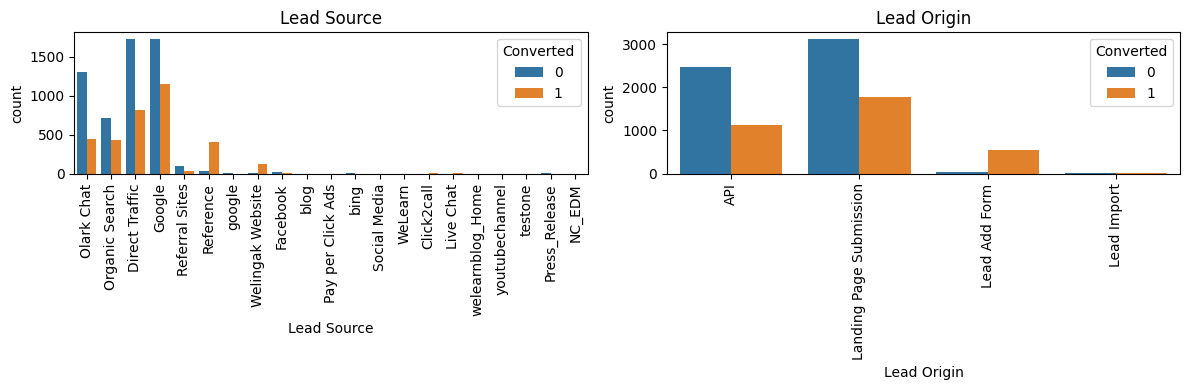

In [27]:

# Check unique values in 'Lead Source' and 'Lead Origin' columns
print("Unique values in 'Lead Source':", lead_s['Lead Source'].unique())
print("Unique values in 'Lead Origin':", lead_s['Lead Origin'].unique())



features = ['Lead Source', 'Lead Origin']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(12, 4))

for i, feature in enumerate(features):
    sns.countplot(x=lead_s[feature], hue=lead_s['Converted'], ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

## Observations

## API and Landing Page submission has less conversion rate but counts of leads are More.

## The count of leads from Add Form is pretty low but conversion rate is High.

## Lead import has very less count as well as conversion rate can be ignored

## To improve overall Lead conversion rate, we need to focus on inc. the conversion rate of 'API' &, 'Landing Page Submission' --> inc the no of leads in Lead Add Form

In [28]:
##It can be seen clearly that all the others values of "Lead Source" are close to negligible and hence we can club them  to "Other" Source for better visualization

lead_s['Lead Source']=lead_s['Lead Source'].replace(['Click2call','Live Chat', 'NC_EDM','Pay per Click Ads', 'Press_Release','Social Media','WeLearn','bing','blog','welearnblog_Home','youtubechannel','testone'],'Other_Lead_Source')

lead_s['Lead Source']=lead_s['Lead Source'].replace("google", 'Google')

lead_s['Lead Source']

0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9074, dtype: object

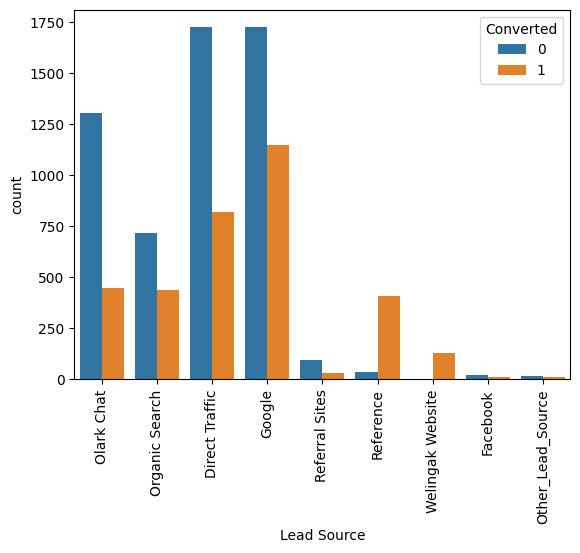

In [29]:
##Check the status of Load Source Again

sns.countplot(x="Lead Source", hue="Converted", data=lead_s)
plt.xticks(rotation='vertical')
plt.show()

##OBSERVATION

## Count of leads from Google and Direct Traffic is max.

## The Conversion rate of the leads from Reference and Welingak website is maximum

To Improve overall lead conversion rate, Focus is needed on increasing the conversion rate of 'Google','Olark Chat'.'Organic Search','Direct traffic' &, also increasing the number of leads from 'Refernce' &, 'Welingak Website'

<ipython-input-30-360771caa5f4>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


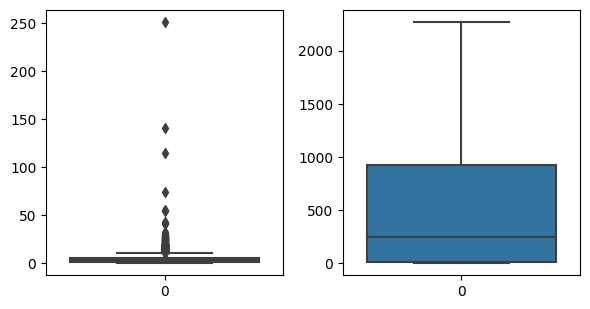

In [30]:
fig = plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits","Total Time Spent on Website"]):
  plt.subplot(2, 2, i+1)
  plt.subplots_adjust(hspace=2.0)
  sns.boxplot(lead_s[feature])
  plt.tight_layout()

In [31]:
## there are lot of Outliers present in Total Visits we can cap this variable to 95 percentile

c1=lead_s["TotalVisits"].quantile(0.95)
lead_s["TotalVisits"][lead_s["TotalVisits"] >= c1] = c1

<ipython-input-31-c6e7b19670c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_s["TotalVisits"][lead_s["TotalVisits"] >= c1] = c1


<ipython-input-32-5b79b63be317>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


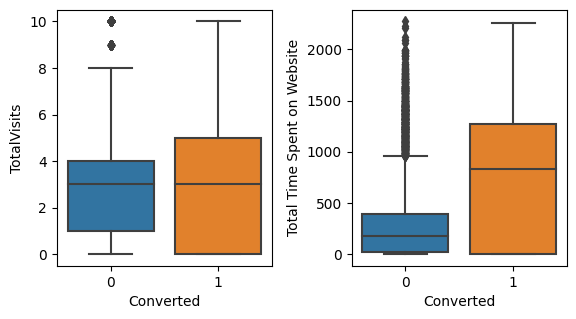

In [32]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits","Total Time Spent on Website"]):
  plt.subplot(2, 2, i+1)
  plt.subplots_adjust(hspace=2.0)
  sns.boxplot(y=feature, x='Converted', data=lead_s)
  plt.tight_layout()

## Observation:

## The median of both the conversion and non-conversion are same &, hence nothing can be concluded .

## User is spending time on website are more likely  to be converted

## Recomendation

--> Websites can be more appealing so as to increase the time of the users on website

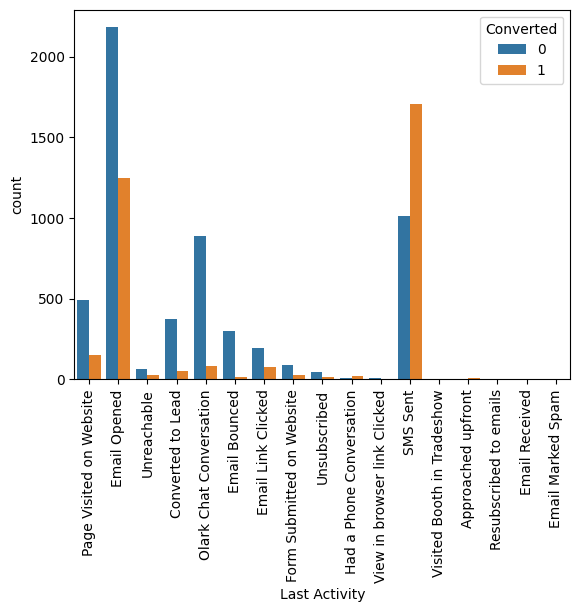

In [33]:
## Plotting the Last Activity

sns.countplot(x="Last Activity", hue="Converted", data=lead_s)

plt.xticks(rotation='vertical')
plt.show()

In [34]:
## there are seome extra variable with no relevance we can make it as 'Other Activity'

# Calculate the frequency of each value in the 'Last Activity' column
activity_counts = lead_s['Last Activity'].value_counts(normalize=True)

# Define a threshold for low frequency (0.006502 in this case)
threshold = 0.006502

# Identify values with low frequency
low_frequency_activities = activity_counts[activity_counts < threshold].index

# Replace these values with 'Other Activity' in the DataFrame
lead_s['Last Activity'] = lead_s['Last Activity'].apply(lambda x: 'Other Activity' if x in low_frequency_activities else x)

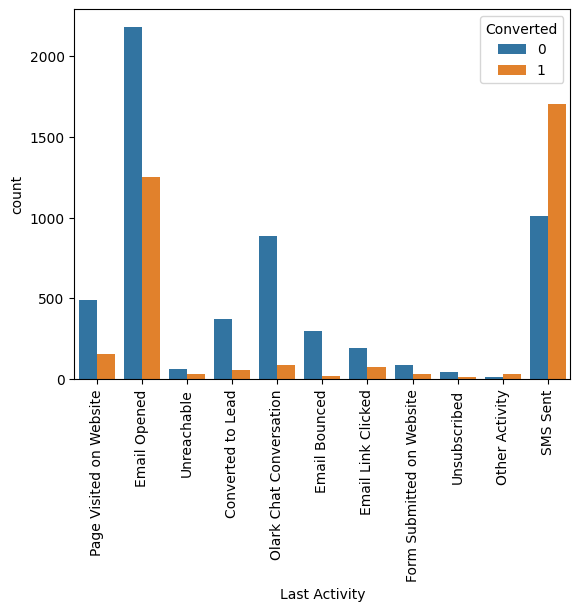

In [35]:
## Plotting the Last Activity

sns.countplot(x="Last Activity", hue="Converted", data=lead_s)

plt.xticks(rotation='vertical')
plt.show()

## Observation

## The Count of "Email Opened" is maxm.

## The Conversion rate of SMS sent as last activity is maxm

## Recommendation

## Need to Focus on increasing the conversion rate of those having last activity as Email opened by making call to those leads ans also try to increase the count if the ines having last activity as SMS sent

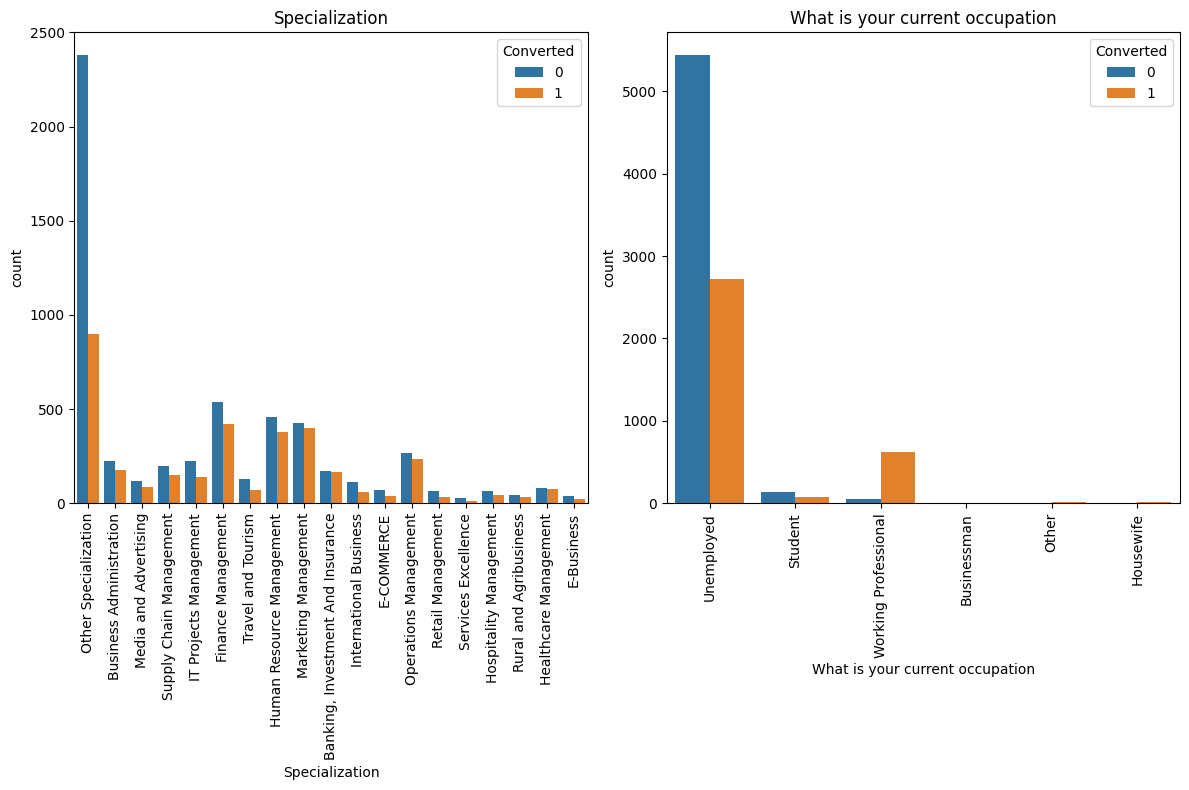

In [36]:
features = ['Specialization', 'What is your current occupation']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(12, 8))

for i, feature in enumerate(features):
    sns.countplot(x=lead_s[feature], hue=lead_s['Converted'], ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

##Observation

## According to above plot, no particular inference can be made for Specialization

## According to above plot, Working professionals have high conversion rate

## Number of Unemployed leads are more than any category


## To Increase OVERALL conversion rate number of working professionals  needs to be increased by reaching out to them through social mediaand also on increasing the conversion rate of Unemployed leads


In [37]:
lead_s.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.191867,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,2.780618,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,10.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


## Oberservation

## From Above table, it can be seen that Most Values in all the columns are 0 i.e. No , so inference can be made using these columns

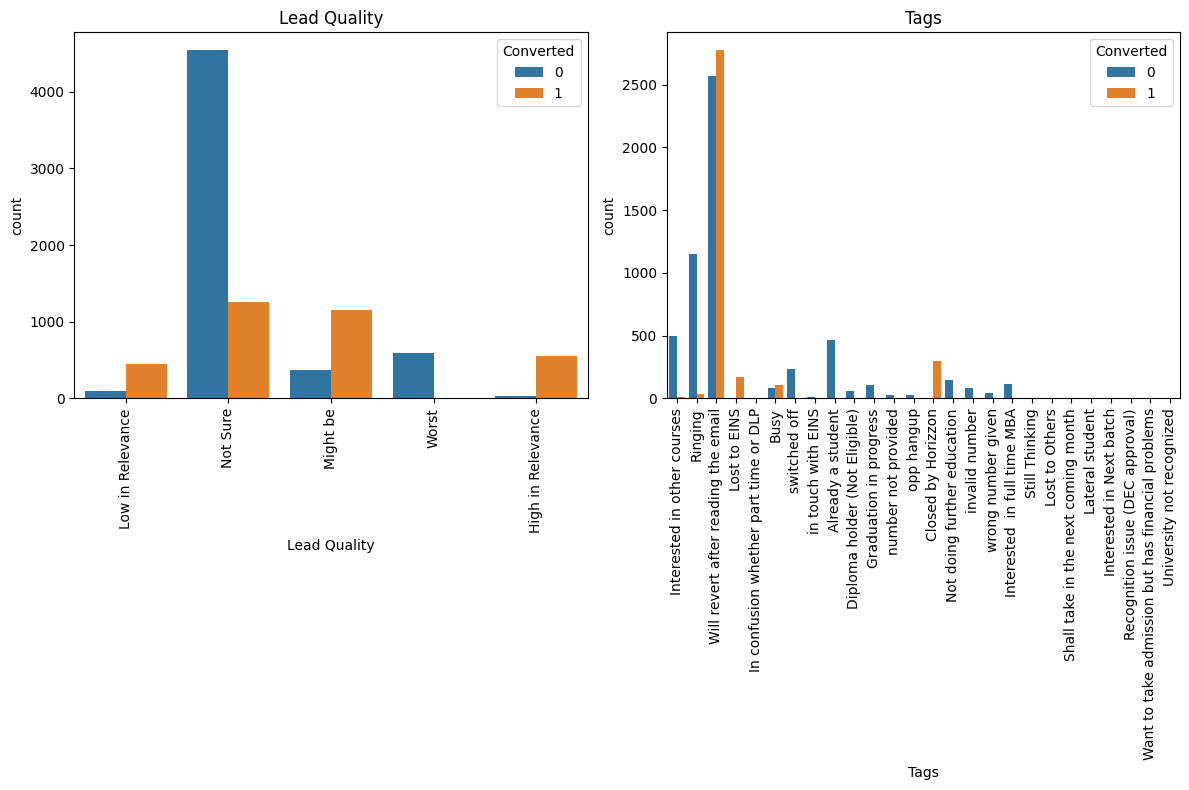

In [38]:
features = ['Lead Quality', 'Tags']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(12, 8))

for i, feature in enumerate(features):
    sns.countplot(x=lead_s[feature], hue=lead_s['Converted'], ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [39]:
## there are seome extra variable with no relevance we can make it as 'Other Activity'

# Calculate the frequency of each value in the 'Last Activity' column
tags_counts = lead_s['Tags'].value_counts(normalize=True)

# # Define a threshold for low frequency (0.005180 in this case)
threshold =  0.005180

# Identify values with low frequency
low_frequency_tags = tags_counts[tags_counts < threshold].index

# Replace these values with 'Other Activity' in the DataFrame
lead_s['Tags'] = lead_s['Tags'].apply(lambda x: 'Other_Tags' if x in low_frequency_tags else x)

In [40]:
tags_counts = lead_s['Tags'].value_counts(normalize=True)
tags_counts

Will revert after reading the email    0.588825
Ringing                                0.130813
Interested in other courses            0.056094
Already a student                      0.051245
Closed by Horizzon                     0.033172
switched off                           0.026449
Busy                                   0.020388
Lost to EINS                           0.018955
Other_Tags                             0.016972
Not doing further education            0.015980
Interested  in full time MBA           0.012784
Graduation in progress                 0.012233
invalid number                         0.009147
Diploma holder (Not Eligible)          0.006943
Name: Tags, dtype: float64

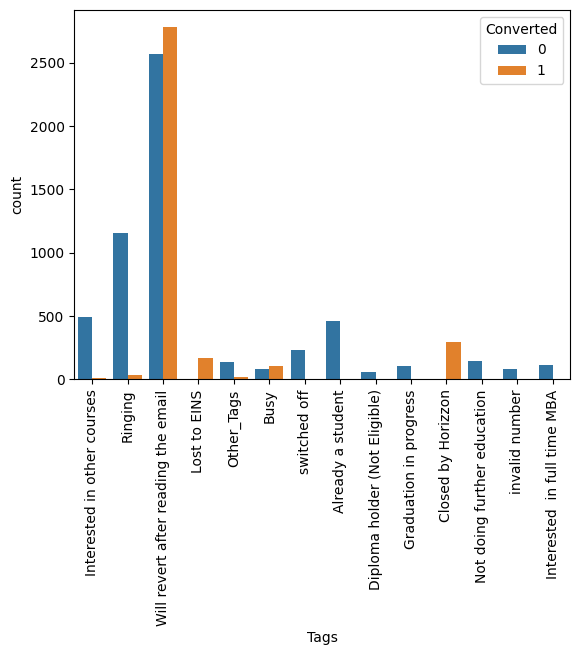

In [41]:
## Plotting the Last Activity

sns.countplot(x="Tags", hue="Converted", data=lead_s)

plt.xticks(rotation='vertical')
plt.show()

## Will Revert After Reading the Email &, Closed By Horizzon have high conversion rate

** SUMMARY **

## to improve the overall lead conversion rate, Focus is needed on "increasing the conversion rate of 'API' and 'Landing Pages Submission' Lead origins and also increasing the number of leads from 'Lead Add Form'

## To imporve overall lead conversion rate, Focus is needed on increasing the conversion rate of 'Google'.'Olark Chart','Organic Search'.'Direct Traffic' and also increasing the number of leads from 'Reference' and ' Wellingak Website'

## Websites can be made more appealing to increase the time of user

## Focus on increasing the conversion rate of those having last activity as Email opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS Sent.

## To increase Overall Conversion rate, we need to increase the number of working professionals leads by reaching out to them through different social sites such as Linkdln etc, and also on increasing the conversion rate of unemployed leads.


## We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [42]:
## Dropping unnecessary columns

lead_s=lead_s.drop(['Lead Number','What matters most to you in choosing a course', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview','Country','Do Not Call'],1)

lead_s.head()

<ipython-input-42-cc19b7a57e09>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_s=lead_s.drop(['Lead Number','What matters most to you in choosing a course', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [43]:
lead_s.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

## DUMMY VARIABLE CREATION

In [44]:
dummy=pd.get_dummies(lead_s[['Lead Origin', 'Lead Source', 'Last Activity','Lead Quality','City','Last Notable Activity','What is your current occupation','Tags','Specialization']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
lead_s=lead_s.drop(['Lead Origin', 'Lead Source', 'Last Activity','Lead Quality','City','Last Notable Activity','What is your current occupation','Tags','Specialization'], axis=1)

lead_s.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


In [46]:
## Combine the dummy and lead_s dataframe

lead_s=pd.concat([lead_s,dummy], axis=1)
lead_s.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#####TEST_TRAIN SPLIT

In [47]:
##Putting feature in X
X = lead_s.drop(['Converted'], axis=1)

## Putting Response variable to y

y = lead_s['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## According to dataset we have 3 variable with numeric category others are 0 and 1 , so numeric also needs to be scaled with feature scaling

In [48]:
## Spilttimg the Data into train &, test Set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##FEATURE SCALING

In [49]:

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns in X_train
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
160,0,-0.071614,0.961655,0.298374,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2267,0,-1.147903,-0.886605,-1.125450,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8895,0,-1.147903,-0.886605,-1.125450,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
854,0,0.287149,2.136489,0.772982,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3640,0,0.287149,-0.505974,0.772982,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
## Conversion rate
print("Conversion rate is: ", (sum(lead_s['Converted']) / len(lead_s['Converted'].index)) * 100)



## without Any Efforts Company has 37 percent lead conversion

Conversion rate is:  37.85541106458012


## Looking At COORELATIONS

In [51]:
# Correlation between different Numerical variables for both the converted and not converted cases

conv_corr=lead_s.corr()

#Unstacking the coorealtions matrix to find out Top Correaltions
conv_corr_unstacked=conv_corr.unstack().sort_values(kind='quicksort')
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

<ipython-input-51-d65417f7e472>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)


Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

In [52]:
##Dropping the highly coorelated features in boh train and test data

X_train=X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)


X_test=X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

<ipython-input-52-cc48a35054d0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train=X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
<ipython-input-52-cc48a35054d0>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test=X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)


In [53]:
conv_corr=X_train.corr()

##MODEL BUILDING with Logistix Regression

In [54]:
## Fit on Model

lgm = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
result = lgm.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7180
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1485.9
Date:                Sun, 17 Sep 2023   Deviance:                       2971.9
Time:                        17:08:02   Pearson chi2:                 5.52e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6013
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3069      1.741      0.751      0.453      -2.106       4.719
Do Not Email                                            -1.1432      0.285     -4.010      0.000      -1.702      -0.585
TotalVisits                                              0.1069      0.078      1.362      0.173      -0.047       0.261
Total Time Spent on Website                              1.0935      0.058     18.950      0.000       0.980       1.207
Page Views Per Visit                                    -0.1480      0.079     -1.879      0.060      -0.302       0.006
Lead Origin_Landing Page Submission                     -0.9660      0.203     -4.759      0.000      -1.364      -0.568
Lead Origin_Lead Add Form                               -0.1751      1.318     -0.133      0.894      -2.758       2.407
Lead Origin_Lead Import                                  0.8673      0.766      1.133      0.257      -0.633       2.368
Lead Source_Google                                       0.2023      0.140      1.441      0.150      -0.073       0.478
Lead Source_Olark Chat                                   1.0094      0.210      4.797      0.000       0.597       1.422
Lead Source_Organic Search                               0.2508      0.190      1.319      0.187      -0.122       0.623
Lead Source_Other_Lead_Source                            0.8478      0.798      1.062      0.288      -0.717       2.413
Lead Source_Reference                                    1.6474      1.367      1.205      0.228      -1.032       4.327
Lead Source_Referral Sites                              -0.0775      0.430     -0.180      0.857      -0.920       0.765
Lead Source_Welingak Website                             5.3629      1.514      3.543      0.000       2.396       8.330
Last Activity_Email Bounced                             -0.6028      0.740     -0.815      0.415      -2.053       0.847
Last Activity_Email Link Clicked                        -0.9096      0.428     -2.128      0.033      -1.747      -0.072
Last Activity_Email Opened                              -0.4092      0.326     -1.256      0.209      -1.048       0.229
Last Activity_Form Submitted on Website                  0.2526      0.555      0.455      0.649      -0.835       1.340
Last Activity_Olark Chat Conversation                   -0.6149      0.367     -1.675      0.094      -1.334       0.105
Last Activity_Other Activity                             1.3205      1.154      1.144      0.252      -0.941       3.582
Last Activity_Page Visited on Website                   -0.4921      0.374     -1.316      0.188      -1.225       0.241
Last Activity_SMS Sent                                   1

##FEATURE SELECTION USING RFE &, optimize model by p-value , VIF

In [55]:

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
ranking = rfe.ranking_

print("Selected Features:")
print(selected_features)
print("Feature Rankings:")
print(ranking)

# To get the support and ranking of features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features:
Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')
Feature Rankings:
[ 3 51  2 50 11  1 23 41  1 40 32 60 52  1 27 17 26 34 18  6 25  1 10  9
 56  8  1  1 48 57 59 49 21 28 53 62 38 42  1  1 61 55 37 31  5  4 24  1
  1 12 36 14 13  1  7 15  1  1  1  1 54 63 16 45 44 64 58 29 22 30 43 33
 20 39 47 35 46 19]


[('Do Not Email', False, 3),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 50),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Other_Lead_Source', False, 32),
 ('Lead Source_Reference', False, 60),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', False, 18),
 ('Last Activity_Other Activity', False, 6),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 10),
 

In [56]:
col=X_train.columns[rfe.support_]

##Assessing Model with Stats Model

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1795.7
Date:                Sun, 17 Sep 2023   Deviance:                       3591.4
Time:                        17:08:20   Pearson chi2:                 3.83e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5657
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [58]:
##Getting the predicted values on the train set

y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

160     0.925933
2267    0.077656
8895    0.989226
854     0.925933
3640    0.275993
7090    0.010438
4366    0.275993
6174    0.000961
857     0.061542
7264    0.062819
dtype: float64

In [59]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.25932887e-01, 7.76558909e-02, 9.89225683e-01, 9.25932887e-01,
       2.75992575e-01, 1.04383088e-02, 2.75992575e-01, 9.61380409e-04,
       6.15416174e-02, 6.28190672e-02])

In [60]:
##Creating a new columns predicted with 1 if conversion_probability is greeater than 0.5 else 0
y_train_pred_final=pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['predicted']=y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Convert,Convert_Prob,predicted
0,1,0.925933,1
1,0,0.077656,0
2,1,0.989226,1
3,1,0.925933,1
4,0,0.275993,0


In [61]:
print(f"Accuracy Score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy Score 0.9212012673922028


## CHECKING VIF's

In [62]:
def calculate_vif(X_train):
  vif_df=pd.DataFrame()
  vif_df['Features']=X_train.columns
  vif_df['Variance Inflation Factor']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
  vif_df['Variance Inflation Factor']=round(vif_df['Variance Inflation Factor'],2)
  vif_df=vif_df.sort_values(by='Variance Inflation Factor', ascending=False)
  print(vif_df)

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
2                    Lead Source_Welingak Website                       1.34
9                         Tags_Closed by Horizzon                       1.18
8                                       Tags_Busy                       1.11
14                              Tags_switched off                       1.10
7   Last Notable Activity_Olark Chat Conversation                       1.08
10                              Tags_Lost to EINS                       1.06
13                            Tags_invalid number                       1.03
0                       Lead Origin_Lead Add Form                       0.74
5                              Lead Quality_Worst                       0.52
11                                   Tags_Ringing                       0.29
3                          Last Activity_SMS Sent                       0.13
12       Tags_Will revert after reading the email                       0.12

##All variables have good VIF's, ==> but "tags invalid number" has high p-value and hence  we will drop this column

In [63]:
col=col.drop('Tags_invalid number')

In [64]:
## Re-Run the Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1801.8
Date:                Sun, 17 Sep 2023   Deviance:                       3603.7
Time:                        17:08:21   Pearson chi2:                 3.83e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5650
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [65]:
##Creating a new columns predicted with 1 if conversion_probability is greeater than 0.5 else 0
y_train_pred_final=pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['predicted']=y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,predicted
0,1,0.925933,1
1,0,0.077656,0
2,1,0.989226,1
3,1,0.925933,1
4,0,0.275993,0


In [66]:
print(f"Accuracy Score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy Score 0.9212012673922028


In [67]:
##CHECK VIF AGAIN

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
2                    Lead Source_Welingak Website                       1.34
9                         Tags_Closed by Horizzon                       1.18
8                                       Tags_Busy                       1.11
13                              Tags_switched off                       1.10
7   Last Notable Activity_Olark Chat Conversation                       1.08
10                              Tags_Lost to EINS                       1.05
0                       Lead Origin_Lead Add Form                       0.74
5                              Lead Quality_Worst                       0.52
11                                   Tags_Ringing                       0.29
3                          Last Activity_SMS Sent                       0.13
12       Tags_Will revert after reading the email                       0.12
1                          Lead Source_Olark Chat                       0.10

In [68]:
def evaluate_model(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  # Extract values from the confusion matrix
  TN, FP, FN, TP = cm.ravel()

  # Calculate accuracy
  accuracy = (TP + TN) / (TP + TN + FP + FN)

  # Calculate sensitivity
  sensitivity = TP / (TP + FN)

  # Calculate specificity
  specificity = TN / (TN + FP)

  # Calculate precision
  precision = TP / (TP + FP)

  print("Accuracy:", accuracy)
  print("Sensitivity:", sensitivity)
  print("Specificity:", specificity)
  print("Precision:", precision)

  return accuracy, sensitivity, specificity, precision

In [69]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted)

Accuracy: 0.9212012673922028
Sensitivity: 0.8549204052098408
Specificity: 0.9619577308120133
Precision: 0.9325177584846093


(0.9212012673922028,
 0.8549204052098408,
 0.9619577308120133,
 0.9325177584846093)

####PLOTTING ROC CURVE

An ROC CURVE :
 shows trade off between sensitivity and specificity ( inc in one will cause decrese in other)

 the closer the curve follows the y-axis and then top border of the ROC space, means more area under the curve and more accurate the test

In [70]:

##DRAW ROC
from sklearn.metrics import roc_curve, auc
def draw_roc(actual, probs):

  fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

  return None

In [71]:
fpr, tpr, threshold=metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate=False)

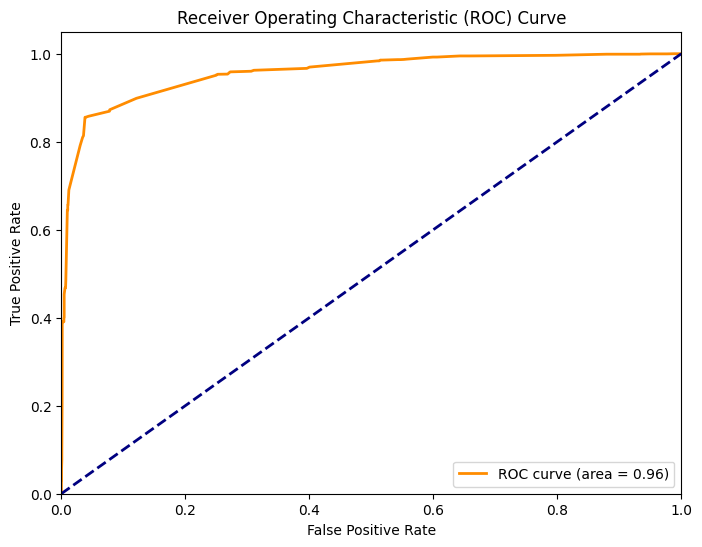

In [72]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [73]:
## Finding Cutt off for better Results

## For Different Cut offs

for i in [float(x)/10 for x in range(10)]:
  y_train_pred_final[i]=y_train_pred_final.Convert_Prob.map(lambda x:1 if x > i else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.925933,1,1,1,1,1,1,1,1,1,1,1
1,0,0.077656,0,1,0,0,0,0,0,0,0,0,0
2,1,0.989226,1,1,1,1,1,1,1,1,1,1,1
3,1,0.925933,1,1,1,1,1,1,1,1,1,1,1
4,0,0.275993,0,1,1,1,0,0,0,0,0,0,0


In [74]:
## calculating Accuracy , sensitivity &, specificity for various probability 0.1 to 0.9

df=pd.DataFrame(columns=['probability_score', 'accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

Accuracy: 0.38076870092299214
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.38076870092299214
Accuracy: 0.805069568811131
Sensitivity: 0.959479015918958
Specificity: 0.7101223581757509
Precision: 0.670543615676359
Accuracy: 0.8087890894062543
Sensitivity: 0.9591172214182344
Specificity: 0.7163515016685206
Precision: 0.6752419765664799
Accuracy: 0.9020526243284199
Sensitivity: 0.8693921852387844
Specificity: 0.9221357063403782
Precision: 0.87286596440247
Accuracy: 0.9206502273040363
Sensitivity: 0.855643994211288
Specificity: 0.9606229143492769
Precision: 0.9303697875688435
Accuracy: 0.9212012673922028
Sensitivity: 0.8549204052098408
Specificity: 0.9619577308120133
Precision: 0.9325177584846093
Accuracy: 0.9209257473481196
Sensitivity: 0.8541968162083936
Specificity: 0.9619577308120133
Precision: 0.9324644549763034
Accuracy: 0.9059099049455848
Sensitivity: 0.8078871201157742
Specificity: 0.9661846496106785
Precision: 0.9362683438155136
Accuracy: 0.862377737980438
Sensitivity: 0.6562952

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.380769,1.000000,0.000000,0.380769
0.1,0.1,0.805070,0.959479,0.710122,0.670544
0.2,0.2,0.808789,0.959117,0.716352,0.675242
0.3,0.3,0.902053,0.869392,0.922136,0.872866
0.4,0.4,0.920650,0.855644,0.960623,0.930370
0.5,0.5,0.921201,0.854920,0.961958,0.932518
0.6,0.6,0.920926,0.854197,0.961958,0.932464
0.7,0.7,0.905910,0.807887,0.966185,0.936268
0.8,0.8,0.862378,0.656295,0.989099,0.973698
0.9,0.9,0.860862,0.651592,0.989544,0.974567


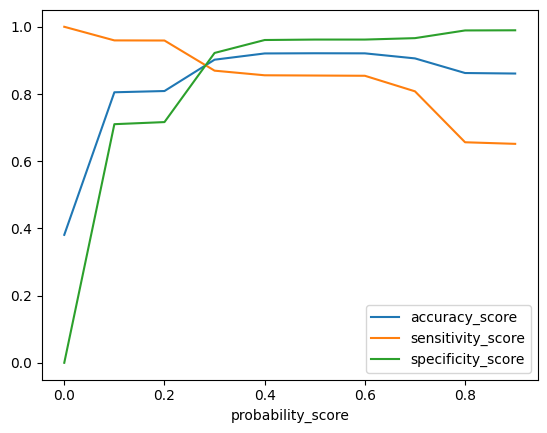

In [75]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score', 'specificity_score'])
plt.show()

PRECISION_RECALL TRADEOFF

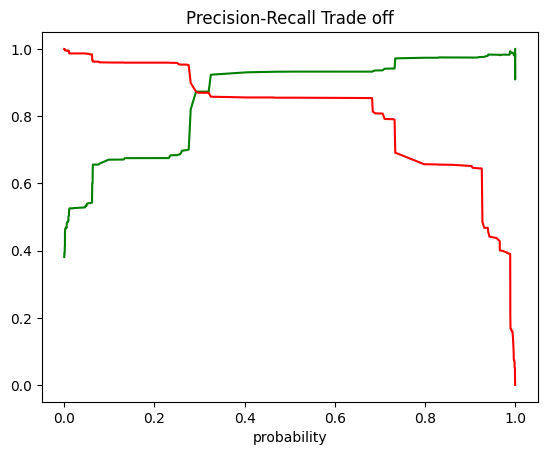

In [77]:
p, r, thresholds=precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("probability")
plt.title("Precision-Recall Trade off")
plt.show()

##Observations

## In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

## We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [78]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,predicted,Convert_predicted,Lead_Score
0,1,0.925933,1,1,93
1,0,0.077656,0,0,8
2,1,0.989226,1,1,99
3,1,0.925933,1,1,93
4,0,0.275993,0,1,28


In [80]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted)

Accuracy: 0.8258713321394131
Sensitivity: 0.953328509406657
Specificity: 0.7474972191323693
Precision: 0.6989389920424404


(0.8258713321394131, 0.953328509406657, 0.7474972191323693, 0.6989389920424404)

In [81]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()


,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.276864,1,28
1,1,1490,0.925885,1,93
2,0,7936,0.276864,1,28
3,1,4216,0.998589,1,100
4,0,3830,0.276864,1,28


In [82]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted)

Accuracy: 0.8027548209366391
Sensitivity: 0.9299552906110283
Specificity: 0.7281468531468531
Precision: 0.667379679144385


(0.8027548209366391, 0.9299552906110283, 0.7281468531468531, 0.667379679144385)

## Final Model { Write a function which predicts output based on Any Cutoff } use different cutoff values based on specific use cases.




In [85]:
def final_model(X_train, y_train, X_test, y_test, cutoff=0.5):

  # Train Model
  # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())

    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())

    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted)

    return y_test_pred_final

In [86]:
#PASS CUT OFF = 0.27
final_model(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0          160          1             0.925885                  1          93
1         2267          0             0.077929                  0           8
2         8895          1             0.988986                  1          99
3          854          1             0.925885                  1          93
4         3640          0             0.276864                  1          28
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.276864                  1          28
1         1490          1             0.925885                  1          93
2         7936          0             0.276864                  1          28
3         4216          1             0.998589                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.276864,1,28
1,1490,1,0.925885,1,93
2,7936,0,0.276864,1,28
3,4216,1,0.998589,1,100
4,3830,0,0.276864,1,28
...,...,...,...,...,...
1810,8792,0,0.001499,0,0
1811,8563,0,0.001377,0,0
1812,2249,1,0.988730,1,99
1813,9065,0,0.001410,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Prospect ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Convert_Probability'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Convert_predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Prospect ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Convert_Probability'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Convert_predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Prospect ID', 'Converted'], ['Converted', 'Convert_Probability'], ['Convert_Probability', 'Convert_predicted'], ['Convert_predicted', 'Lead_Score']]], **{})
chart

In [87]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                           -1.351034
Lead Origin_Lead Add Form                        0.845114
Lead Source_Olark Chat                           0.023178
Lead Source_Welingak Website                     3.251863
Last Activity_SMS Sent                           1.949176
Lead Quality_Not Sure                           -3.485199
Lead Quality_Worst                              -4.042894
Last Notable Activity_Modified              

## ANALYSIS




**Model Type:** Logistic Regression

**Probability Prediction:** The model predicts the probability of conversion rather than the direct value of the target variable.

**Optimal Cutoff:** You've chosen a cutoff of 0.27. Any lead with a greater than 0.27 probability of converting is predicted as a Hot Lead, and any lead with 0.27 or less probability of converting is predicted as a Cold Lead.

**Features: **The final model includes 14 features, including both binary and categorical features. Some of the key features are related to email, lead origin, lead source, last activity, tags, and lead quality.

**Key Categorical Variables**: 'Tags_Lost to EINS,' 'Tags_Closed by Horizzon,' and 'Lead Quality_Worst' are highlighted as top categorical features based on the absolute value of their coefficient factors.

**Sensitivity:** The model has a sensitivity of 0.928, indicating that it correctly predicts 92% of customers who actually convert.

**Precision:** The precision of the model is 0.68, meaning that 68% of the predicted Hot Leads are true Hot Leads.

**Reusable Code Block:** Reusable code block for predicting the Convert value and Lead Score, which allows you to use different cutoff values based on specific use cases.




**Improved Lead Prioritization:**

By using the model's predicted probabilities, the business can prioritize leads more effectively. Leads with a higher probability of conversion (Hot Leads) can receive more attention and resources, while leads with a lower probability (Cold Leads) may be nurtured differently or de-prioritized.